In [1]:
# Load python modules
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split

In [2]:
rawBostonData = pd.read_csv("Boston.csv")

In [3]:
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
rawBostonData.info() # Check for any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
# Check the and drop duplicate from the dataset
rawBostonData = rawBostonData.drop_duplicates()

In [8]:
# List column names of the DataFrame
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [17]:
# Rename the column names
renamedBostonData = rawBostonData.rename\
                    (columns = {\
                     'CRIM': 'crimeRatePerCapita',\
                     ' ZN ':'landOver25K_sqft',\
                     'INDUS ':'non-retailLandProptn',\
                     'RM':'AvgNo.RoomsPerDwelling', \
                     'DIS': 'PropOwnerOccupied',\
                     'RAD':'weightedDist',\
                     'RAD':'radiaHighwaysAccess',\
                     'RAX':'PropTaxRate_per10k',\
                     'PTRATIO': 'pupilTeacherRatio',\
                     'LSTAT': 'pctLowerStatus',\
                     'MEDV':'mediaValue_Ks'})

renamedBostonData.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,CHAS,NOX,AvgNo.RoomsPerDwelling,AGE,PropOwnerOccupied,radiaHighwaysAccess,TAX,pupilTeacherRatio,pctLowerStatus,mediaValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [18]:
renamedBostonData.info() # to inspect the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   CHAS                    506 non-null    int64  
 4   NOX                     506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   AGE                     506 non-null    float64
 7   PropOwnerOccupied       506 non-null    float64
 8   radiaHighwaysAccess     506 non-null    int64  
 9   TAX                     506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  mediaValue_Ks           506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [19]:
# Calculate basic statistics for the numeric columns
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
PropOwnerOccupied,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radiaHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We used the pandas function, **describe**, called on the DataFrame to calculate simple statistics for numeric fields (this includes any field with **numpy** number data type) in the DataFrame. The statistics include the minimum, the maximum, the count of rows in each column, the average (mean), the 25th percentile, the 50th percentile, and the 75th percentile. We transpose (using the .T function) the output of the **describe** fuction to get a better layout.

In [20]:
# Dvide DataFrame into training and test sets
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, y_train,\
                    X_test, y_test = train_test_split(X, y, \
                    test_size = test_data_size, \
                    random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

We choose a test data size of 30%, which is *3.0*. The *train_test_split* function is used to achieve this. We set the seed of the random number generator so that we can obtain a reproducible split each time we run this code. An arbitrary value of *10* is used here. It is good model-building practice to divide a dataset being used to develop a model into at least two parts. One part is used to develop the model and it is called training set *(X_train* and *y_train* conditioned).

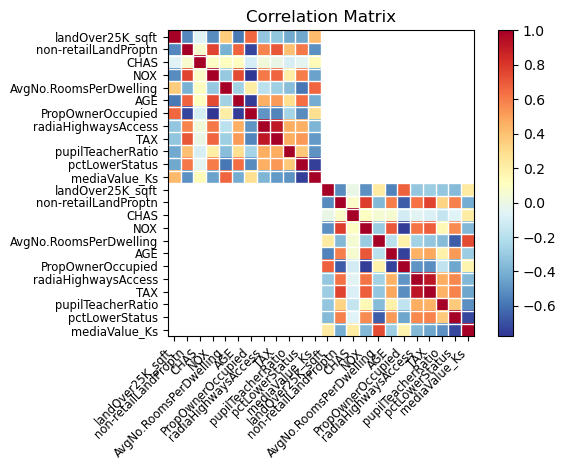

In [23]:
# Calculate and plot a correlation matrix for the **train_data** set:
corrMatrix = train_data.corr(method = 'pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames, \
            title=None, normcolor=False, cmap='RdYlBu_r')

In the preceeding heatmap, we can see that there is a strong positive correlation (an increase in one causes an increase in the other) between variables that have orange or red squares. There is a strong negative correlation (an increase in one causes a decrease in the other) between variables with blue squares. There is little or no correlation between variables with pale-colored squares. For example, there appears to be a relatively strong correlation between **nitrixOxide_pp10m** and **non-retailLandProptn**, but a low correlation between **riverDummy** and anyother variable.

In [24]:
train_data.corr(method = 'pearson')

,landOver25K_sqft,non-retailLandProptn,CHAS,NOX,AvgNo.RoomsPerDwelling,AGE,PropOwnerOccupied,radiaHighwaysAccess,TAX,pupilTeacherRatio,...,CHAS,NOX,AvgNo.RoomsPerDwelling,AGE,PropOwnerOccupied,radiaHighwaysAccess,TAX,pupilTeacherRatio,pctLowerStatus,mediaValue_Ks
landOver25K_sqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non-retailLandProptn,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvgNo.RoomsPerDwelling,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropOwnerOccupied,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radiaHighwaysAccess,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pupilTeacherRatio,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
